In [20]:
#Step 1:Import the necessary libraries for data processing, visualization, and clustering.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
#Step 2: load the data into a pandas and use info

data0 = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
data0.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [25]:
#Step 3: Performing standard scaling

scaler = StandardScaler()
data0[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(data0[['Income', 'CCAvg']])

data0[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [28]:
#Step 4: Perform k-mean clustering specofy 3 clustering

model = KMeans(n_clusters = 3, random_state = 42)
cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(data0[cluster_cols])
data0['Cluster'] = model.predict(data0[cluster_cols])

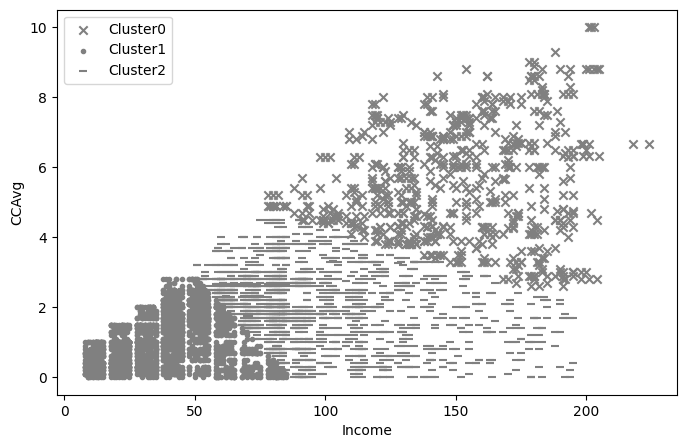

In [30]:
#Step 5: Visualize the clusters by using different markers

markers = ['x', '.', '_']
plt.figure(figsize = [8,5])

for clust in range(3):
    
    temp = data0[data0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, marker = markers[clust],color = 'grey', label = "Cluster"+str(clust))
    
    plt.xlabel('Income')
    plt.ylabel('CCAvg')
    plt.legend()
    

In [34]:
#Step 6: Print out the average values of Income and CCAvg for the three clusters
data0.groupby('Cluster')[['Income', 'CCAvg']].mean()


,Income,CCAvg
Cluster,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


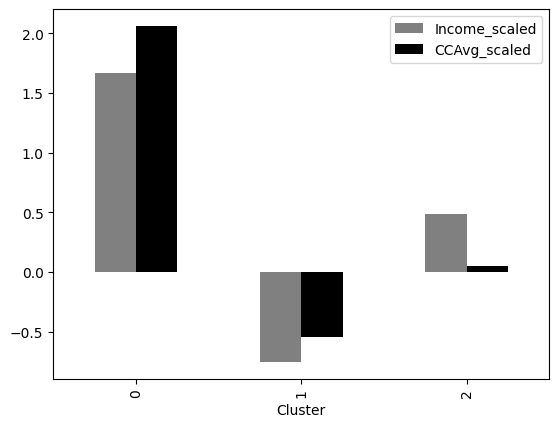

In [36]:
#Step 7: Visualize comparison of the clusters

data0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar(color=['grey', 'black'])
plt.show()


In [38]:
#Step 8: Average relevant features

sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']

data0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


In [39]:
#Activity 3.02: Bank Customer Segmentation with Multiple Features

data_scaled = data0.copy()
cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience','Mortgage']
data_scaled[cluster_cols] = scaler.fit_transform(data_scaled[cluster_cols])

In [40]:
data_scaled[cluster_cols].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17,-2.131628e-18,-1.179501e-16,-5.613288e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [41]:
#Perform k-means clustering

model=KMeans(n_clusters = 3, random_state = 42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [42]:
#Using PCA to scale columns

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])
data_scaled['pc1']=pca_res[:,0]
data_scaled['pc2']=pca_res[:,1]

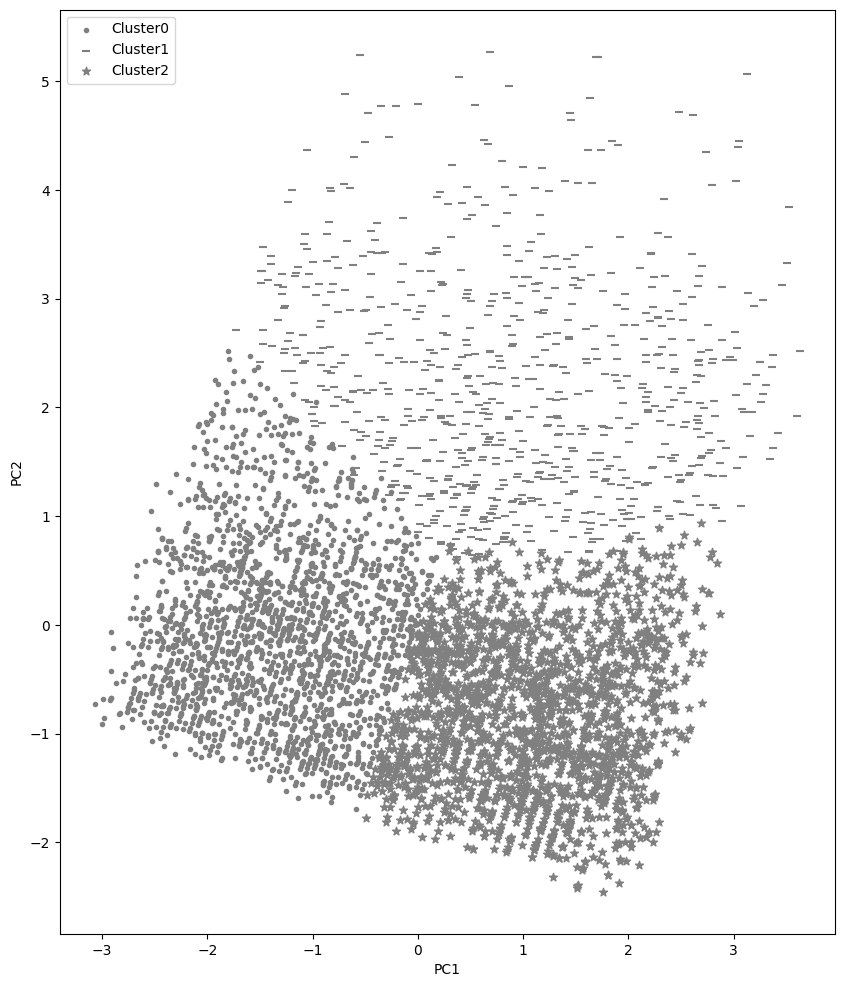

In [50]:
#Visualize the clusters

markers = ['.','_','*']
plt.figure(figsize=[10,12])

for clust in range(3):
    
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], label="Cluster"+str(clust), color = 'gray')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    